<a href="https://colab.research.google.com/github/UndiedPerson-V2/COVID-19-classification-of-X-ray-images/blob/main/W5_MNIST_Dataset_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hands-on ML Workshop**


Task: Train a Simple Machine Learning Model in Python

Tools: Google Colab: MNIST Dataset

# Data Preprocessing

1.Get and Import MNIST Data Using pandas

In [ ]:
import pandas as pd

mnist_df = #code here

2.Inspect data

In [ ]:
# Display the Iris dataset


3.Data Splitting

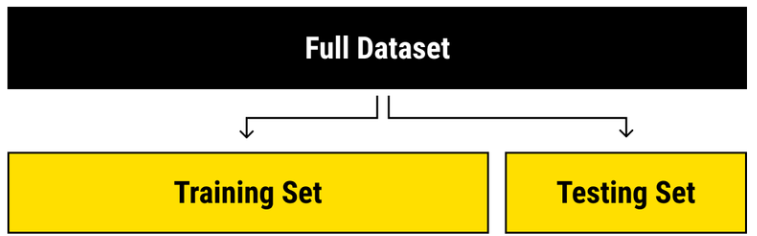

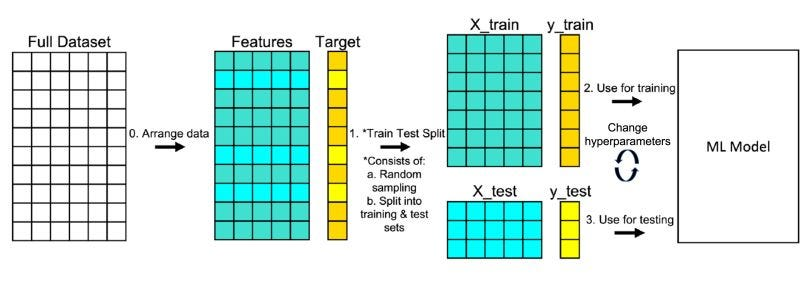

In [ ]:
X = mnist_df.drop('', axis=1)#code here
y = mnist_df[''] #code here

In [ ]:
#Inspect X after drop Species column
print('X.shape : ',X.shape)
print('y.shape :',y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = #code here

In [ ]:
#Inspect shape of the data after train_test_split
print('X train : ',#code here)

print('X test :',#code here)

# Create and Train a Model

## Artificial Neural Network (ANN) Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


### Define the ANN model architecture

In [ ]:
ann = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', name='hidden_layer_1'),
    layers.Dense(32, activation='relu', name='hidden_layer_2'),
    layers.Dense(10, activation='softmax', name='output_layer') # 10 classes for MNIST digits
])

ann.summary()

### Compile the ANN model

In [ ]:
ann.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Train the ANN model

In [ ]:
history = ann.fit(
    X_train,
    y_train,
    epochs=10, # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_split=0.2 # Use a portion of training data for validation
)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Make Predictions with ANN

In [ ]:
y_pred_ann = ann.predict(#code here)
y_pred_ann_classes = np.argmax(#code here, axis=1)

### Evaluate the ANN Model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print('Accuracy of ANN-Test: ', accuracy_score(#code here))
print('\nClassification Report for ANN:\n', classification_report(#code here))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_ann = confusion_matrix(y_test, y_pred_ann_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()